Modify this line to briefly discribe the functionality of ./ProtVec/testing_protvec_and_tsne.ipynb<br/><br/>Copyright (C) 2017  Martin Engqvist Lab<br/>This program is free software: you can redistribute it and/or modify<br/>it under the terms of the GNU General Public License as published by<br/>the Free Software Foundation, either version 3 of the License, or<br/>(at your option) any later version.<br/>This program is distributed in the hope that it will be useful,<br/>but WITHOUT ANY WARRANTY; without even the implied warranty of<br/>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br/>GNU General Public License for more details.<br/>You should have received a copy of the GNU General Public License<br/>along with this program.  If not, see <http://www.gnu.org/licenses/>.

In [14]:
import os
from dotenv import load_dotenv, find_dotenv
from os.path import join, dirname, basename, exists, isdir
import numpy as np
from collections import Counter
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
from colcol import scales

### Load environmental variables from the project root directory ###
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# now you can get the variables using their names

# Check whether a network drive has been specified
DATABASE = os.environ.get("NETWORK_URL")
if DATABASE == 'None':
    pass
else:
    pass
    #mount network drive here

# set up directory paths
CURRENT_DIR = os.getcwd()
PROJ = dirname(dotenv_path) # project root directory

DATA = join(PROJ, 'data') #data directory
RAW_EXTERNAL = join(DATA, 'raw_external') # external data raw directory
RAW_INTERNAL = join(DATA, 'raw_internal') # internal data raw directory
INTERMEDIATE = join(DATA, 'intermediate') # intermediate data directory
FINAL = join(DATA, 'final') # final data directory

RESULTS = join(PROJ, 'results') # output directory
FIGURES = join(RESULTS, 'figures') # figure output directory
PICTURES = join(RESULTS, 'pictures') # picture output directory


# make folders specific for certain data
folder_name = 'BRENDA_2019.1_ec_data'
if folder_name != '':
    #make folders if they don't exist
    if not exists(join(RAW_EXTERNAL, folder_name)):
        os.makedirs(join(RAW_EXTERNAL, folder_name))

    if not exists(join(INTERMEDIATE, folder_name)):
        os.makedirs(join(INTERMEDIATE, folder_name))

    if not exists(join(FINAL, folder_name)):
        os.makedirs(join(FINAL, folder_name))

print('Standard variables loaded, you are good to go!')

Standard variables loaded, you are good to go!


In [3]:
# get the vector data


filename = 'protVec_100d_3grams.tsv'
filepath = join(RAW_EXTERNAL, 'protvec', filename)


    
def load_data(filename):
    '''
    Load up the vector data
    '''
    data = {}
    with open(filename, 'r') as f:
        for line in f:
            elements = line.split('\t')
            
            if elements[0] == '<unk>':
                continue
            
            codon = elements[0]
                
            data[codon] = {}
                
            for num in range(1, 10):
                data[codon][num] = np.array([float(i)*num for i in elements[1:]])
                
    return data



def round_number(x, factor=1000):
    '''
    Multiply number by a factor and then convert to an int
    '''
    return int(round(x * factor))



def score_seq(seq, enbedding, to_int=True):
    '''
    Use the embedding to calculate a feature vector for a protein sequence.
    
    This is the fastest one. Gives a performance of about 4.2 hours for 10 mio sequences.
    '''
    seq = seq.upper()  
    
    # make all the three-mers
    three_mers = Counter([seq[i:i+3] for i in range(0, len(seq)-2)])
    
    # multiply the occurances with the feature vector
    c = [enbedding[k][v] for k, v in three_mers.items()]
    
    # sum the columns of the generated vectors
    vector_sums = np.array(c).sum(axis=0)
    
    # convert to int if desired
    if to_int is True:
        vector_sums = vector_sums.apply(round_number)
    
    return vector_sums.tolist()
    
    
    
# load up the enbedding data
enbedding = load_data(filepath) 




In [4]:

seq = "MAVSAGSARTSPSSDKVQKDKAELISGPRQDSRIGKLLGFEWTDLSSWRRLVTLLNRPTDPASLAVFRFLFGFLMVLDIPQERGLSSLDRKYLDGLDVCRFPLLDALRPLPLDWMYLVYTIMFLGALGMMLGLCYRISCVLFLLPYWYVFLLDKTSWNNHSYLYGLLAFQLTFMDANHYWSVDGLLNAHRRNAHVPLWNYAVLRGQIFIVYFIAGVKKLDADWVEGYSMEYLSRHWLFSPFKLLLSEELTSLLVVHWGGLLLDLSAGFLLFFDVSRSIGLFFVSYFHCMNSQLFSIGMFSYVMLASSPLFCSPEWPRKLVSYCPRRLQQLLPLKAAPQPSVSCVYKRSRGKSGQKPGLRHQLGAAFTLLYLLEQLFLPYSHFLTQGYNNWTNGLYGYSWDMMVHSRSHQHVKITYRDGRTGELGYLNPGVFTQSRRWKDHADMLKQYATCLSRLLPKYNVTEPQIYFDIWVSINDRFQQRIFDPRVDIVQAAWSPFQRTSWVQPLLMDLSPWRAKLQEIKSSLDNHTEVVFIADFPGLHLENFVSEDLGNTSIQLLQGEVTVELVAEQKNQTLREGEKMQLPAGEYHKVYTTSPSPSCYMYVYVNTTELALEQDLAYLQELKEKVENGSETGPLPPELQPLLEGEVKGGPEPTPLVQTFLRRQQRLQEIERRRNTPFHERFFRFLLRKLYVFRRSFLMTCISLRNLILGRPSLEQLAQEVTYANLRPFEAVGELNPSNTDSSHSNPPESNPDPVHSEF"







# calculate an enbedded representation of the protein
import time

n = 1000

t1 = time.time()

for i in range(n):
    vector = score_seq(seq, enbedding, to_int=False)
t2 = time.time()

print('per seq', (t2-t1)/n)


print(vector)

per seq 0.0006559357643127441
[-58.42623600000004, -10.759072000000014, -13.220239000000015, -58.86460700000002, 5.293894999999993, -5.665261000000001, 21.071880000000025, -6.472677000000013, -15.875790999999998, 45.233404999999955, -16.031058999999978, -0.758817999999997, -1.837570000000002, 25.22429200000001, -3.6504390000000013, 3.459047999999994, 22.935611000000005, -26.155718000000014, -0.32191200000000003, -8.340253999999996, -5.105318999999998, -25.539444000000003, -23.19527599999999, 8.482181999999993, -14.642847999999969, -16.00841699999999, -6.310183999999995, -11.114567000000005, 1.3573779999999984, -11.257596000000012, 3.773756000000001, -40.655131999999966, -4.725194, -18.261205000000004, 28.14971599999999, 10.776018999999987, -30.358725000000007, 3.498790999999996, 12.19339700000001, -11.294632999999994, 19.950574000000007, 8.672497, 17.57202499999999, -1.9167750000000021, 7.114125999999995, 1.0858759999999994, -16.649106999999987, 7.0591729999999995, -9.182861000000004, 

In [5]:
# Nice function to profile the performance

def profile(function, *args, **kwargs):
    """ Returns performance statistics (as a string) for the given function.
    """
    def _run():
        function(*args, **kwargs)
    import cProfile as profile
    import pstats
    import os
    import sys; sys.modules['__main__'].__profile_run__ = _run
    id = function.__name__ + '()'
    profile.run('__profile_run__()', id)
    p = pstats.Stats(id)
    p.stream = open(id, 'w')
    p.sort_stats('time').print_stats(20)
    p.stream.close()
    s = open(id).read()
    os.remove(id)
    return s


print(profile(score_seq, seq, enbedding, to_int=False))

Thu Mar 14 17:12:41 2019    score_seq()

         23 function calls in 0.005 seconds

   Ordered by: internal time
   List reduced from 21 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.003    0.003    0.003    0.003 {built-in method numpy.array}
        1    0.001    0.001    0.001    0.001 <ipython-input-3-95e9e90ed562>:52(<listcomp>)
        1    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.000    0.000 <ipython-input-3-95e9e90ed562>:49(<listcomp>)
        1    0.000    0.000    0.000    0.000 {built-in method _collections._count_elements}
        1    0.000    0.000    0.005    0.005 <ipython-input-3-95e9e90ed562>:40(score_seq)
        1    0.000    0.000    0.005    0.005 <ipython-input-5-bdf9142c2631>:6(_run)
        1    0.000    0.000    0.005    0.005 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'tolist'

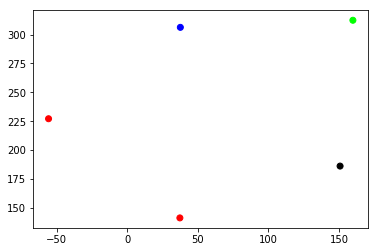

In [6]:
# first test of t-SNE


import matplotlib.pyplot as plt

import numpy as np
from sklearn.manifold import TSNE

X = np.array([[0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 0, 0, 0], [1, 1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)


my_colors = ['#000000', '#FF0000', '#FF0000', '#00FF00', '#0000FF']

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=my_colors)


/home/martin/anaconda3/envs/py37/lib/python3.7/site-packages/Bio/Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


35


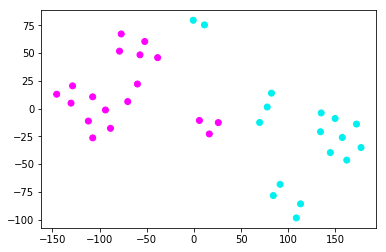

In [8]:
# test on a real dataset, the DLD and D2HGDH datasets




def vectorize_fasta(filepath):
    '''
    Take a fasta file and return, in order the embedded sequence vectors.
    '''
    data = []
    for record in SeqIO.parse(filepath, format='fasta'):
        header, seq = record.description, record.seq
        
        data.append(score_seq(seq, enbedding, to_int=False))

    return np.array(data), len(data)
        
    
    
def vectorize_fasta_list(filepath_list):
    '''
    Process a list of fasta files
    '''
    all_data = None
    seqs_per_file = []
    
    for filepath in filepath_list:
        fasta_data, fasta_len = vectorize_fasta(filepath)
        
        # how many seqs per file
        seqs_per_file.append(fasta_len)
        
        if all_data is None:
            all_data = np.array(fasta_data)
            
        else:
            all_data = np.concatenate((all_data, fasta_data), axis=0)
        
    print(len(all_data))
    return all_data, seqs_per_file
    
    
    
def make_color_vector(num_vector):
    '''
    Make a vector with the number of colors corresponding to the number of sequences
    '''
    colors = ['#FF00FF', '#00F0F0']
    
    color_vector = []
    for i in range(0, len(num_vector)):
        color_vector.extend([colors[i], ]*num_vector[i])
        
    return color_vector
    
    

    

# get an array of the data in the fasta files
X, num_seqs_per_fasta = vectorize_fasta_list(filepath_list=[join(RAW_EXTERNAL, 'dehydrogenase_test_data', 'D2HGDH.fasta'), join(RAW_EXTERNAL, 'dehydrogenase_test_data', 'DLD.fasta')])


# see how many seqs in each and make a color vector 
my_colors = make_color_vector(num_seqs_per_fasta)


# calculate t-SNE
X_embedded = TSNE(n_components=2, 
                  perplexity=8, 
                  n_iter=1000,
                  n_iter_without_progress=300,
                  learning_rate=200,
                  early_exaggeration=12).fit_transform(X)


# visualize
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=my_colors)

In [10]:
# code to use information in a fasta header to assemble the colors used for plotting


filepath = join(RAW_EXTERNAL, '1.1.3.n_test_data', '1_1_3__BRENDA_sequences_filtered.fasta')

def get_all_ec_from_fasta(filepath):
    '''
    Make a list of all the ec numbers in a fasta file
    '''
    data = []
    for record in SeqIO.parse(filepath, format='fasta'):
        header, seq = record.description, record.seq
        
        ec = header.split(';')[2]
        
        data.append(ec)
        
    return data


    
def get_colors_for_items(item_list):
    '''
    Get a set of unique colors
    '''
    item_set = set(item_list)
    
    colors = scales.rainbow(len(item_set))
    
    return {k:v for k,v in zip(list(item_set), colors)}



def make_ordered_color_list(filepath, color_dict):
    '''
    Make a list of colors that signify some information in the fasta header
    '''
    data = []
    for record in SeqIO.parse(filepath, format='fasta'):
        header, seq = record.description, record.seq
        
        ec = header.split(';')[2]
        
        data.append(str(color_dict[ec]))
        
    return data


ec_list = get_all_ec_from_fasta(filepath)
color_dict = get_colors_for_items(ec_list)
color_list = make_ordered_color_list(filepath, color_dict)


/home/martin/anaconda3/envs/py37/lib/python3.7/site-packages/Bio/Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


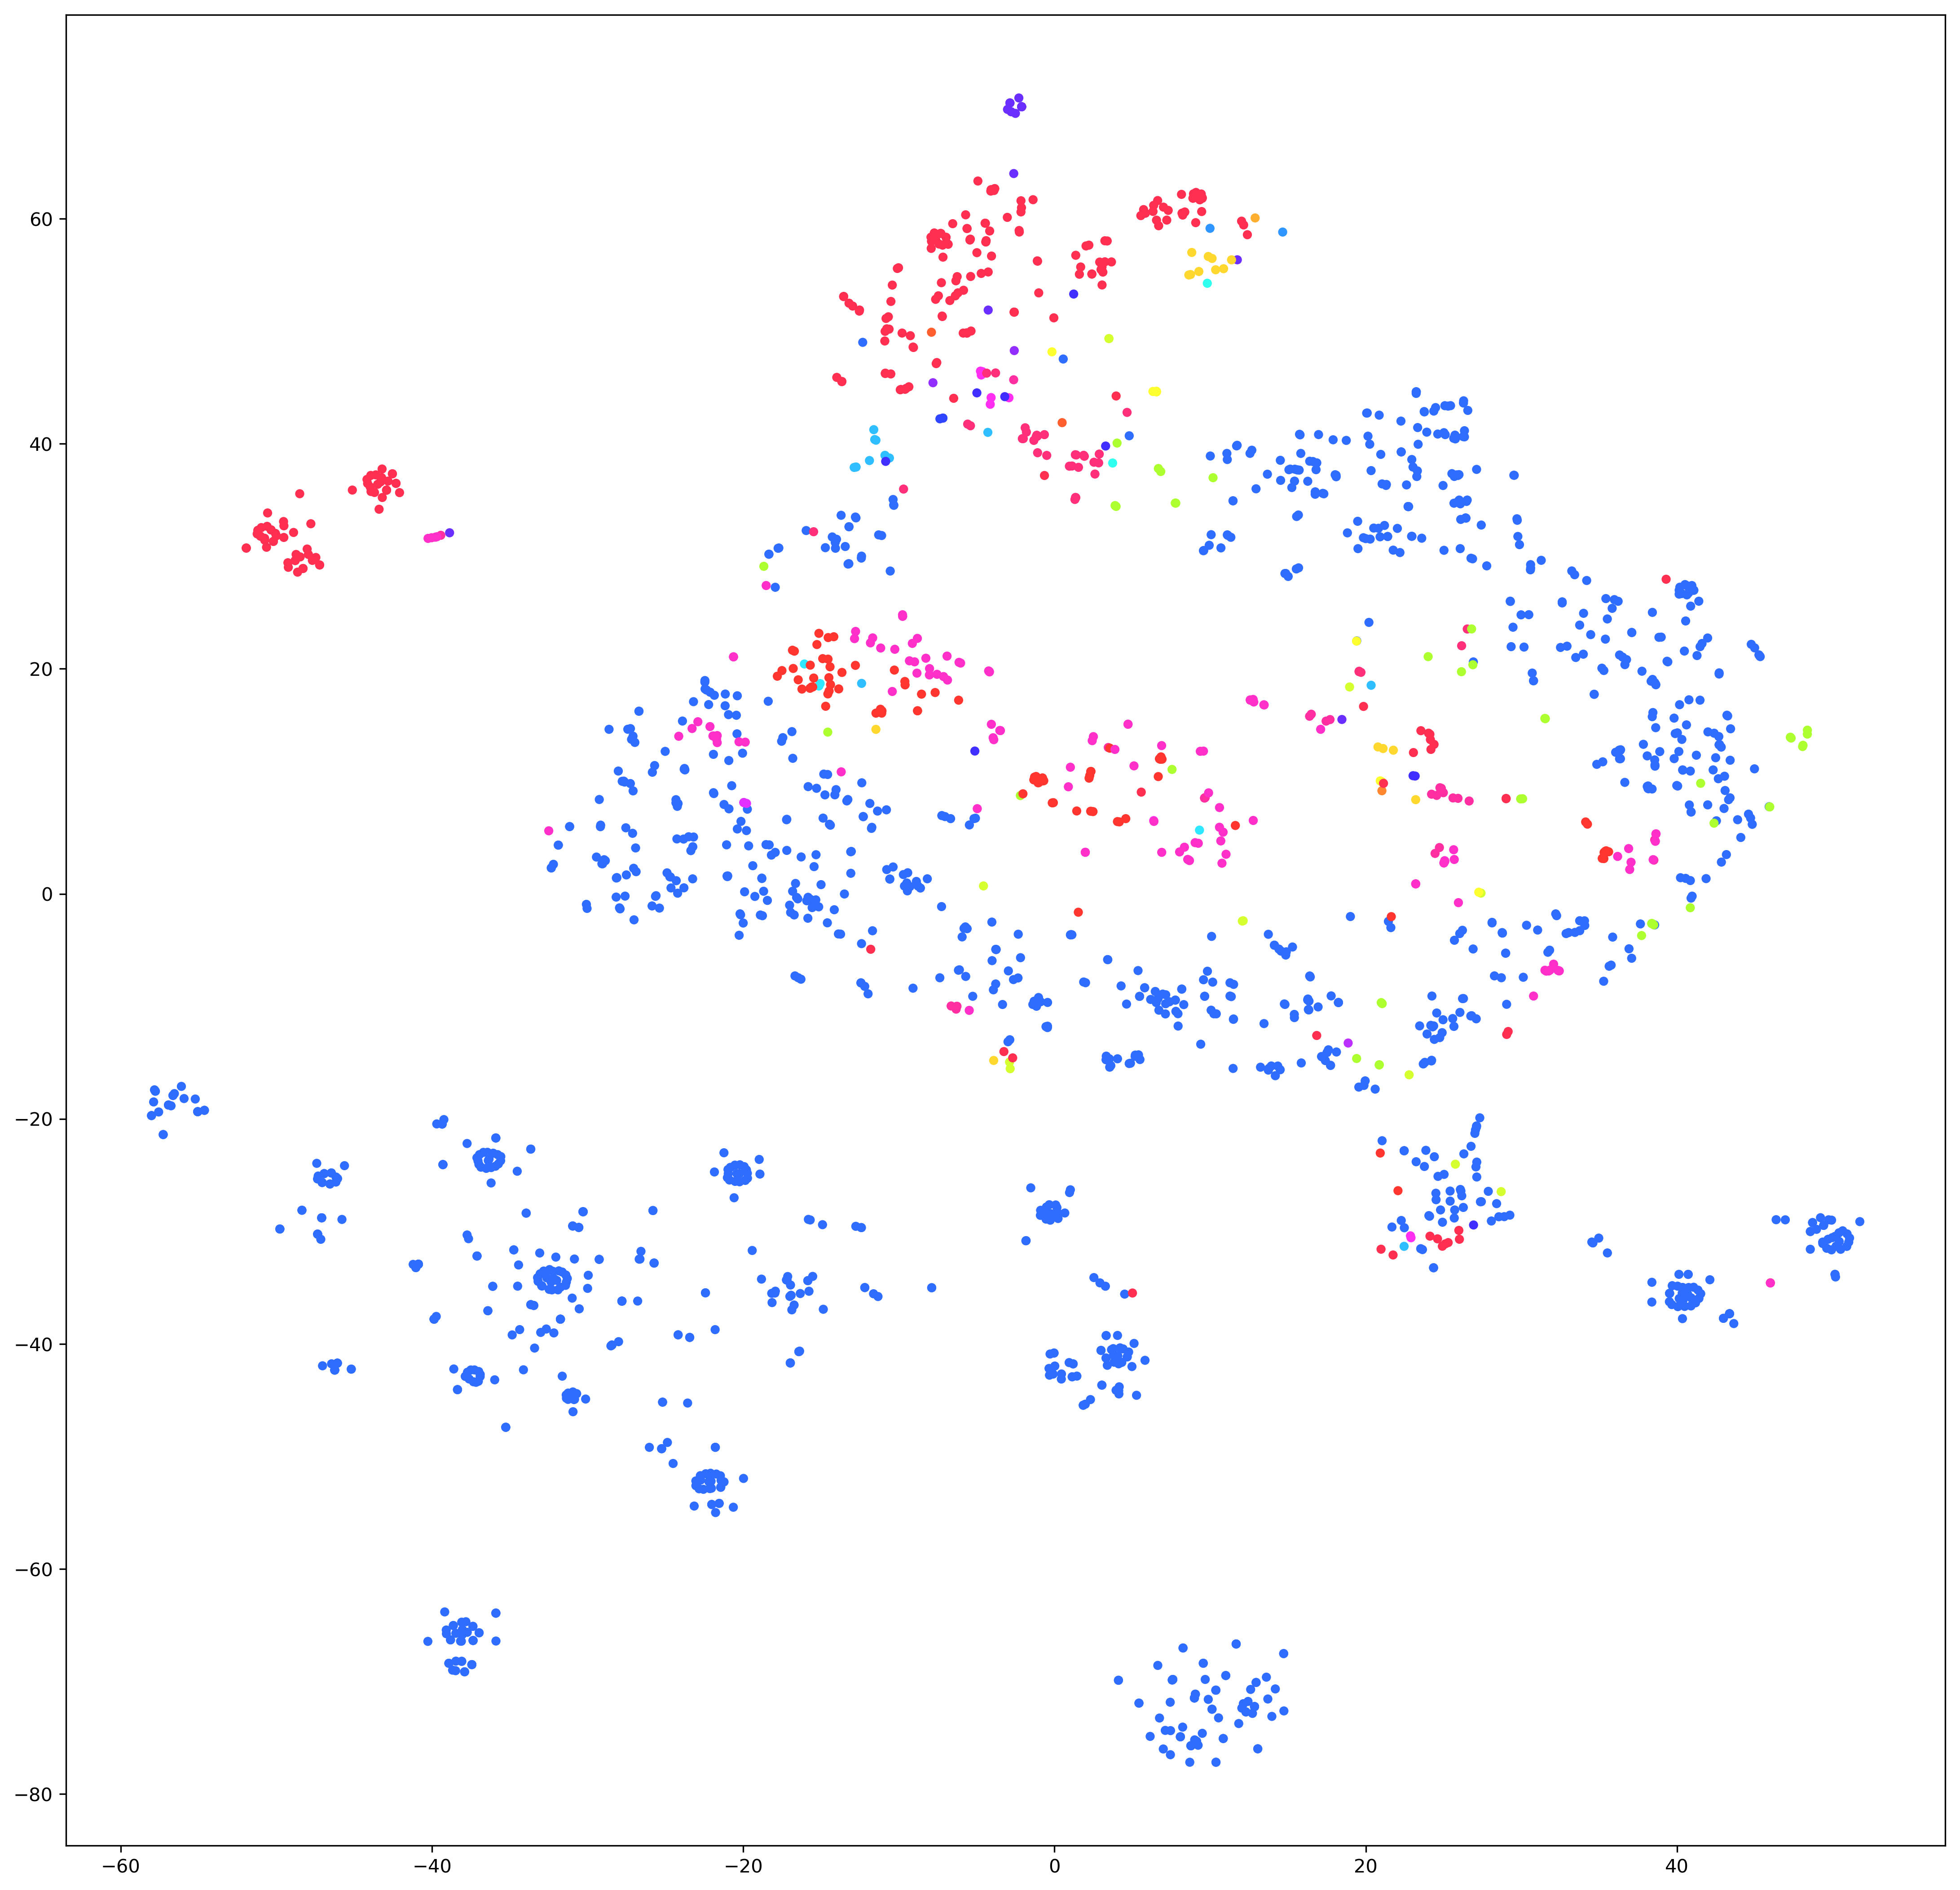

In [11]:
# now let's try the 1.1.3.n dataset

filepath = join(RAW_EXTERNAL, '1.1.3.n_test_data', '1_1_3__BRENDA_sequences_filtered.fasta')



# get an array of the data in the fasta files
X, num_seqs_per_fasta = vectorize_fasta(filepath)


# see how many seqs in each and make a color vector 
my_colors = ['#0000FF', ] * num_seqs_per_fasta
my_sizes = []


# calculate t-SNE
X_embedded = TSNE(n_components=2, 
                  perplexity=30, 
                  n_iter=1000,
                  n_iter_without_progress=300,
                  learning_rate=200,
                  early_exaggeration=8).fit_transform(X)


# visualize
fig=plt.figure(figsize=(18, 18), dpi= 300, facecolor='w', edgecolor='k')

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], 
            c=color_list,
            s=15,
            alpha=1)


In [16]:
# first we need to collect all sequences into one fasta file

filepath = join(RAW_EXTERNAL, 'BRENDA_2019.1_ec_data', 'sequence_data')

all_files = os.listdir(filepath)

new_filepath = join(INTERMEDIATE, 'BRENDA_2019.1_ec_data', 'all_sequences.fasta')

with open(new_filepath, 'w') as f:
    for fi in all_files:
        if not fi.endswith('.fasta'):
            continue
            
        for record in SeqIO.parse(join(filepath, fi), format='fasta'):
            header, seq = record.id, record.seq
            f.write('>%s\n%s\n' % (header, seq))

In [20]:
# get BRENDA file that has beeen filtered with cd-hit








def count_entries(new_filepath):
    '''
    Count number of entries in fasta file.
    '''
    counter = 0
    for record in SeqIO.parse(new_filepath, format='fasta'):
        counter += 1
        
    print("%s sequences in %s" % (counter, filepath))

    

new_filepath = join(INTERMEDIATE, 'BRENDA_2019.1_ec_data', 'all_sequences.fasta')
count_entries(new_filepath)




12708443 sequences in /data/Work/projects/brenda_cheminformatics/data/raw_external/BRENDA_2019.1_ec_data/sequence_data


In [ ]:
# do t-sne on this data, with coloring only sequences from 1.1.3.n



In [ ]:
# try out flt-SNE

## here ## 

In [ ]:
# some stuff I found on-line, for getting ideas of how to use t-SNE

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

# Another example using s-curve
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()

In [ ]:
color
